# Разбор ДЗ2

1. Попробуйте обучить нейронную сеть на Keras на Fashion-MNIST датасете.
2. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [ ]:
# The full neural network code!
###############################
import numpy as np
import pandas as pd
#import mnist
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist



In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

#train_images = mnist.train_images()
#train_labels = mnist.train_labels()
#test_images = mnist.test_images()
#test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# соберу генерацию модели в функцию
def neuron_net(layerList = [64,32]):
  # layerList = [64,32] - список , который передает число слоев (сколько элементов в списке, столько слоев) и число нейронов в слое (значение  каждого элемента списка)
  model = Sequential()
  # первый слой всегда 784 входа
  model.add(Dense(layerList[0], activation='relu', input_shape=(784,)))
  for i in range(len(layerList)-1):
    # число скрытых слоев определим автоматом по длине списка layerList, а число нейронов берем из этого списка по порядку
    model.add(Dense(layerList[i+1], activation='relu'))
  model.add(Dense(10, activation='softmax'))
  # последний слой всегда 10 выходов - такая задача

  # Compile the model.
  model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
  return model

In [ ]:
### Эксперимент
epochs = 100
Error_exp_ = pd.DataFrame(data=np.array([[0,0,0,0,0]]),columns = ['neuron','batch_size','epoch','error','accuracy'])
ik=0
for neuron_ in [64,128,256]:
  # меняю число нейронов скрытого слоя
  #print(neuron_)
  for batch_size_ in [10, 50,100]:
    # меняю размер пакета для обучения
    eerors = []
    acc =[]
    for j in range(3):
      # будем делать несколько перезапусков - сейчас 3
      
      # создаем сеть
      model = neuron_net(layerList = [neuron_,64])
      # учим сеть и проверяем сразу, т.к. включаю validation_split=0.2
      history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
      # записываю результаты валидации, а не обучения - это честно
      eerors.append(history.history['val_loss'][-1])
      acc.append(history.history['val_accuracy'][-1])
    # Табличка !!!! 
    Error_exp_.loc[ik,['neuron','batch_size','epoch','error','accuracy']] = [neuron_,batch_size_,epochs ,np.mean(eerors),np.mean(acc)]
    ik +=1


# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[9 2 1 1 6]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
Error_exp_

,neuron,batch_size,epoch,error,accuracy
0,64.0,10.0,100.0,0.367845,0.866444
1,64.0,50.0,100.0,0.346772,0.875528
2,64.0,100.0,100.0,0.349339,0.871389
3,128.0,10.0,100.0,0.348243,0.874556
4,128.0,50.0,100.0,0.352232,0.871667
5,128.0,100.0,100.0,0.335866,0.879000
6,256.0,10.0,100.0,0.347651,0.874944
7,256.0,50.0,100.0,0.340856,0.876861
8,256.0,100.0,100.0,0.339448,0.878306


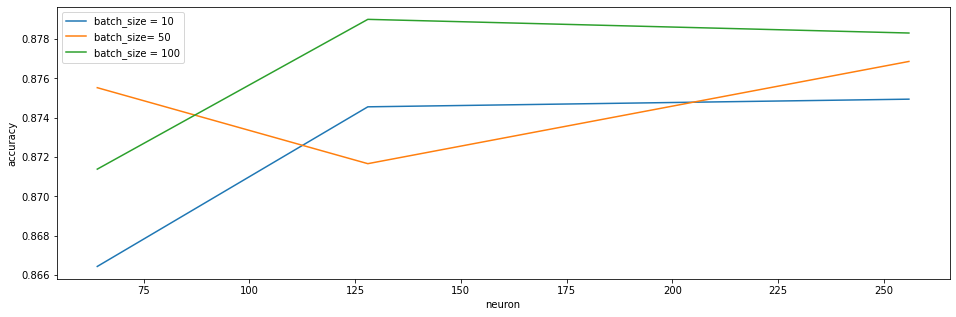

In [ ]:
import matplotlib.pyplot as plt

# ГРАФИКИ !!!!! - это будет точность от числа нейронов по размерам пакетов(batch_size)
e1 = Error_exp_.loc[Error_exp_['batch_size']==10,['neuron','accuracy']]
e2 = Error_exp_.loc[Error_exp_['batch_size']==50,['neuron','accuracy']]
e3 = Error_exp_.loc[Error_exp_['batch_size']==100,['neuron','accuracy']]
plt.figure(figsize=(16,5))

plt.xlabel('neuron')
plt.ylabel('accuracy')
plt.plot(e1['neuron'],e1['accuracy'],label = 'batch_size = 10')
plt.plot(e2['neuron'],e2['accuracy'],label = 'batch_size= 50')
plt.plot(e3['neuron'],e3['accuracy'],label = 'batch_size = 100')
plt.legend()
plt.show()

# Анализ сводной таблицы и графики :

 - больше нейронов - чаще выше точность обучения (при одинаковом размере пакетов)(для пакета batch_size=10 упала, надо провести больше перезапусков сети)

 - Больше нейронов - выше точность (не сильно)

# Рекомендации:
нейронки работают от случайной начальной точки - делаем много перезапусков для анализа архитектуры и осредняем результаты

нейронки работают от случайной начальной точки - делаем много перезапусков дляпоиска лучшего варианта, если делаем обучение для работы

Делаем таблички и графики

Проводим анализ результатов: оцениваем средние ошибки(точности) архитектур и дисперсии ошибок (точности) - потом делаем выводы!!

Для этой задачи можно проверить влияние размера выборки, включать/выключать нормализацию данных, проверить поведение по числу эпох, изменять параметры оптимизатора, брать разные активации, разное число слоев, разный loss и т.п.